### Hipótese 5 (KNN)
`Matheus Raz (mrol@cin.ufpe.br)`

`João Paulo Lins (jplo@cin.ufpe.br)`

#### É possível predizer a plataforma de um game baseado em suas vendas?

In [58]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.neighbors import KNeighborsClassifier 

In [59]:
df = pd.read_csv('vgsalesPP2.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
display(len(df.columns))
df.head()

644

,Name,Platform_left,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,"mixi, Inc",responDESIGN,AO,E,E10+,EC,K-A,M,RP,T
0,Wii Sports,Wii,2006,Sports,Nintendo,1.000000,1.000000,0.368885,0.799432,1.000000,...,0,0,0,1,0,0,0,0,0,0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,0.703095,0.123619,0.666341,0.072848,0.487580,...,0,0,0,1,0,0,0,0,0,0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,0.379110,0.440608,0.370841,0.311258,0.430389,...,0,0,0,1,0,0,0,0,0,0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,0.377418,0.377417,0.320939,0.279092,0.397068,...,0,0,0,1,0,0,0,0,0,0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,0.272485,0.306975,1.000000,0.094607,0.380104,...,0,0,0,1,0,0,0,0,0,0


In [60]:
all_sales = df.iloc[:, 5:10].copy()
all_genres = df.iloc[:, 50:57].copy()

X = all_sales.join(all_genres).values.copy()
y = df["Rating"].values.copy()

In [61]:
X # Valores das vendas e generos.

array([[1.00000000e+00, 1.00000000e+00, 3.68884540e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.03094778e-01, 1.23618785e-01, 6.66340509e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.79110251e-01, 4.40607735e-01, 3.70841487e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 9.78473581e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.41779497e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.78473581e-04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [62]:
y # Valores de Genre

array(['E', 'E', 'E', ..., 'E', 'E', 'E'], dtype=object)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [64]:
success = []
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    success.append(np.mean(pred_i == y_test))
success

[0.582859463850528,
 0.6218521527213647,
 0.6283509341998376,
 0.6356620633631194,
 0.6409423233143785,
 0.6435824532900081,
 0.6506904955320877,
 0.6468318440292445,
 0.6512997562956946,
 0.6519090170593014,
 0.6525182778229082,
 0.6531275385865151,
 0.6533306255077173,
 0.6549553208773355,
 0.6551584077985377,
 0.6541429731925265,
 0.654549147034931,
 0.6541429731925265,
 0.6555645816409423,
 0.6557676685621446,
 0.6541429731925265,
 0.6575954508529651,
 0.6539398862713242,
 0.6547522339561332,
 0.6537367993501219,
 0.6541429731925265,
 0.6557676685621446,
 0.6547522339561332,
 0.65536149471974,
 0.6547522339561332,
 0.6551584077985377,
 0.6547522339561332,
 0.6559707554833468,
 0.6561738424045491,
 0.65536149471974,
 0.654549147034931,
 0.6555645816409423,
 0.6557676685621446,
 0.6573923639317628,
 0.6569861900893582,
 0.6559707554833468,
 0.6557676685621446,
 0.6555645816409423,
 0.6559707554833468,
 0.6559707554833468,
 0.6571892770105605,
 0.6571892770105605,
 0.654549147034931,


Melhor resultado: 0.6575954508529651 para o k igual a 22


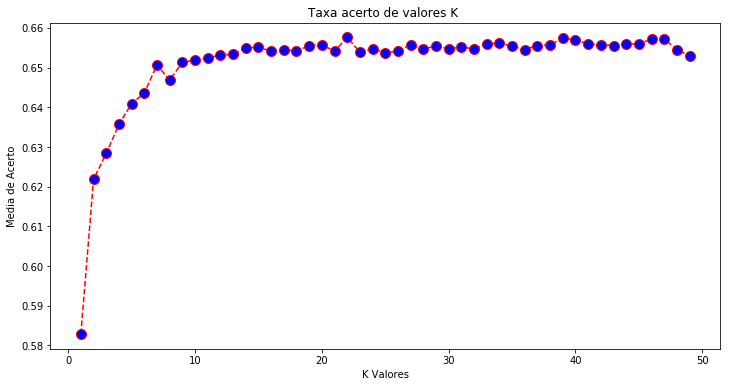

In [65]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), success, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Taxa acerto de valores K ')  
plt.xlabel('K Valores')  
plt.ylabel('Media de Acerto')

best_result = 0
for i in success:
    if(i > best_result):
        best_result = i
best_k_value = success.index(best_result) + 1
print("Melhor resultado:",best_result,"para o k igual a",best_k_value)

In [66]:
classifier = KNeighborsClassifier(n_neighbors=best_k_value)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=22, p=2,
           weights='uniform')

In [67]:
y_pred = classifier.predict(X_test)

In [68]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(40, 20))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [69]:
def list_string_to_list_index(list_keys, list_string):
    list_index = []
    for i in list_string:
        list_index.append(list_keys.index(i))
    return list_index;

Normalized confusion matrix


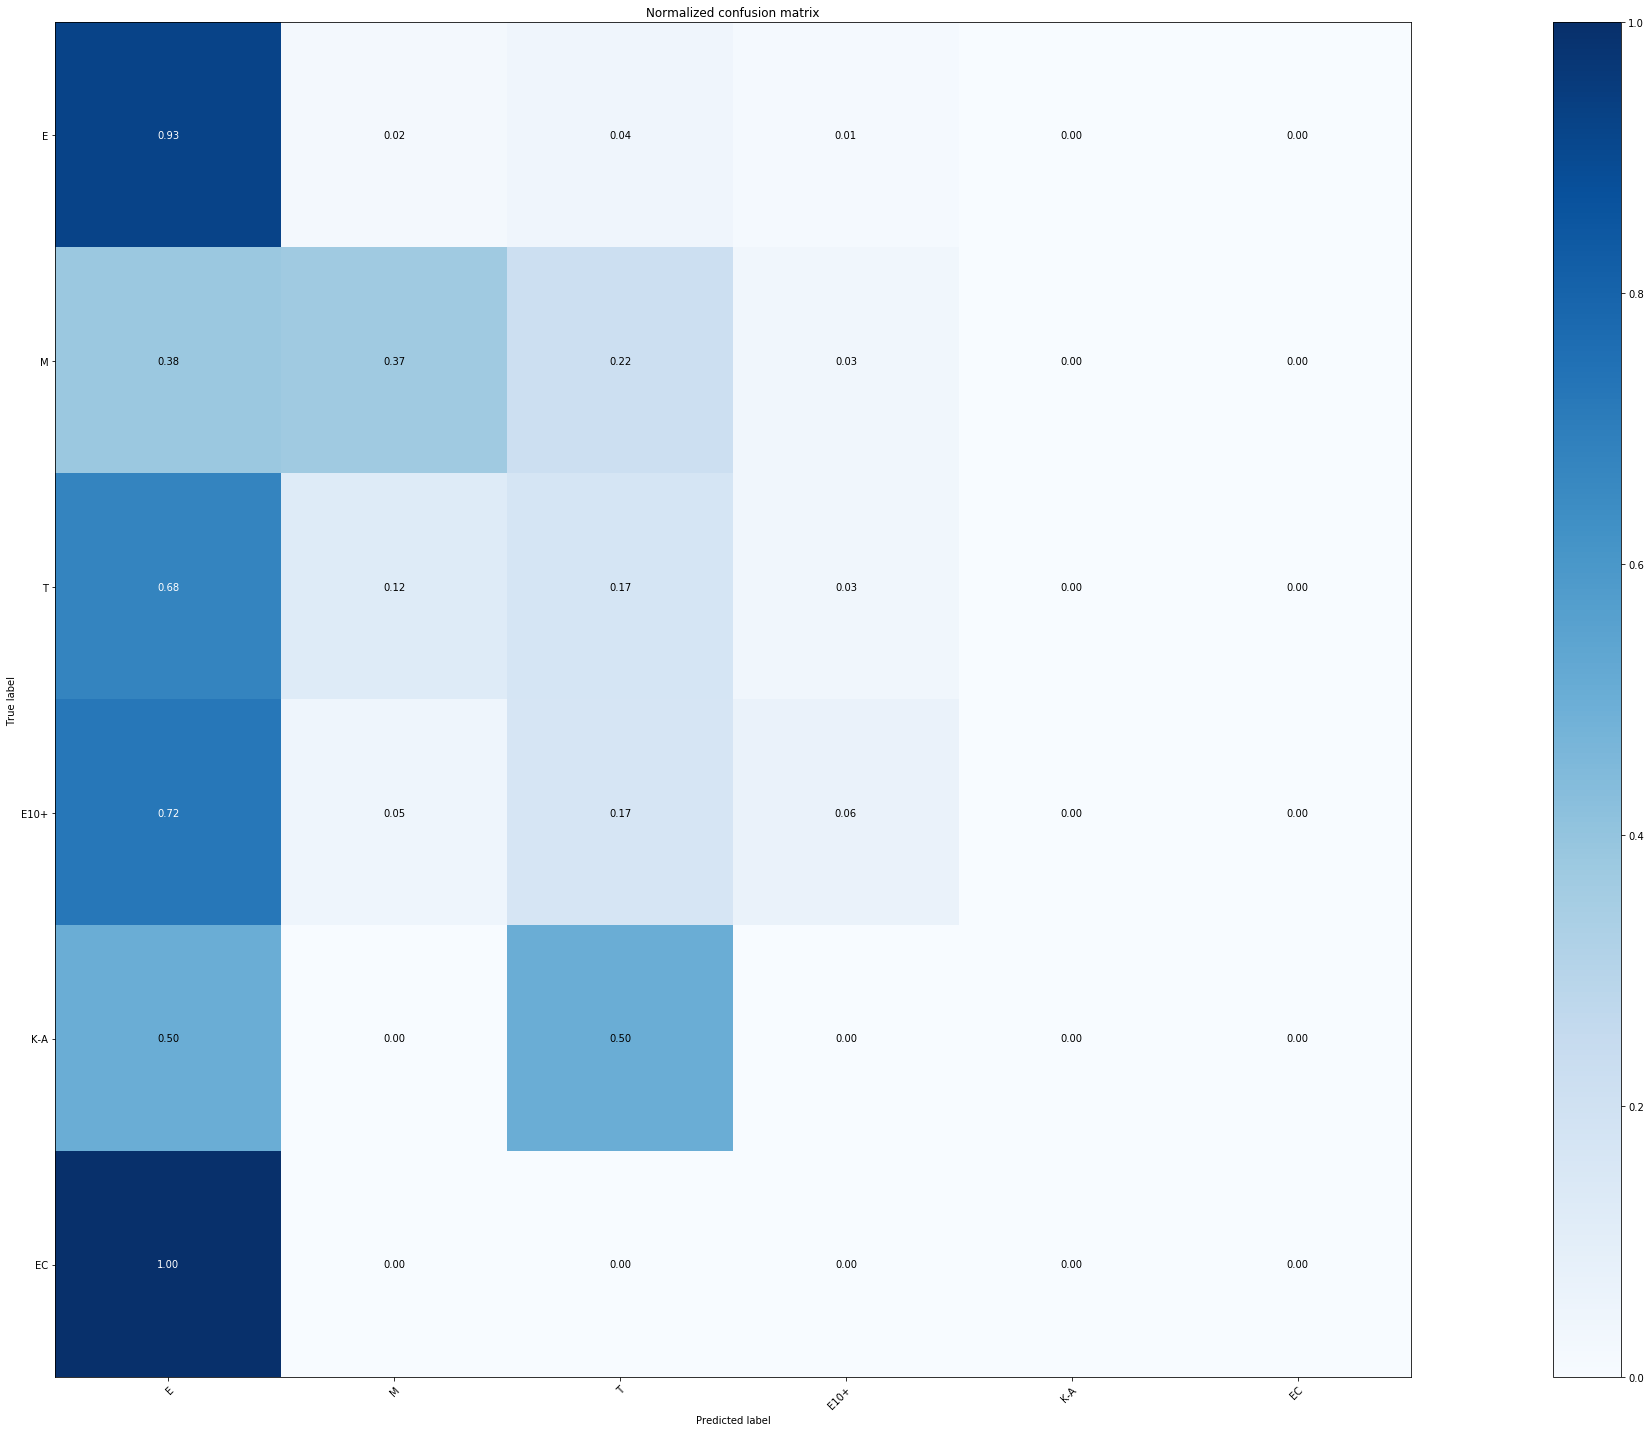

In [70]:
class_names = df["Rating"].unique()

y_test_index = list_string_to_list_index(list(class_names), y_test)
y_pred_index = list_string_to_list_index(list(class_names), y_pred)

plot_confusion_matrix(y_test_index, y_pred_index, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

### Conclusão

O melhor resultado que obtemos foi quando se estabelecem algo próximo à 15 vizinhos, tendo uma taxa de acerto média por volta dos 45%. Porém esse valor é baixo e a hipótese acabou sendo refutada, ou seja, não é possível classificar a plataforma de um jogo com precisão baseado apenas nas suas vendas.